# Discrete Fourier Transform (DFT)
## Interpolation Problem

$N$ given interpolation values $f_n$ at supporting points $x_n = \frac{2 \pi n}{N}$ are given. With the help of the Ansatz functions $g_k(x) = e^{ikx}$ the values shall be interpolated for a sampling size of $s = 100$ per period. This is achieved by the DFT transform and a subsequent inverse DFT for a larger sammpling. 
\begin{gather}
F_k = \frac{1}{N} \sum_{n=0}^{N-1} f_n e^{-i2\pi nk /N}, \quad f_n = \sum_{k=0}^{N-1} F_k e^{i2 \pi nk/N}
\end{gather}
Impoertant: The built in system fft in numpy is scaling with $\frac{1}{N}$ in the inverse FFT by default, such that the Fourier Coefficients may differ by this factor.

Self computed DFT coeff. 
 [ 0.5      +0.00000000e+00j  0.5118034+4.78803873e-01j
  0.1118034-6.34712491e-01j  0.2881966+1.41270905e+00j
 -0.1118034-1.31230334e+00j -0.1      +1.10218212e-16j
 -0.1118034+1.31230334e+00j  0.2881966-1.41270905e+00j
  0.1118034+6.34712491e-01j  0.5118034-4.78803873e-01j]
System computed DFT coeff. 
 [ 5.        +0.00000000e+00j  5.11803399+4.78803873e+00j
  1.11803399-6.34712491e+00j  2.88196601+1.41270905e+01j
 -1.11803399-1.31230334e+01j -1.        -8.88178420e-16j
 -1.11803399+1.31230334e+01j  2.88196601-1.41270905e+01j
  1.11803399+6.34712491e+00j  5.11803399-4.78803873e+00j]


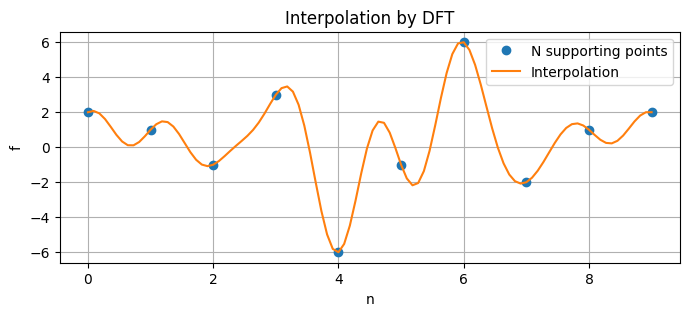

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

f = [2, 1, -1, 3, -6, -1, 6, -2, 1, 2]
N = np.size(f)

# Self written DFT function 
def DFT(f):
    N = np.size(f)
    F = np.array([sum([f[n]*cmath.exp(-1J*2*cmath.pi*n*k/N)/N for n in range(0,N)]) for k in range(0,N)])
    return F

F = DFT(f)

print('Self computed DFT coeff. \n',F)

# Calculation of built in fft algorithm
F_true = np.fft.fft(f)
print('System computed DFT coeff. \n',F_true)

samples = 100

# Self written Inverse DFT function
f_int = np.array([sum([F[k]*cmath.exp(1J*2*cmath.pi*n*k/N) for k in range(0,N)]) for n in np.linspace(0,N-1,samples)])

plt.figure(figsize=(8,3))
plt.plot(range(0,N),f,'o')
plt.plot(np.linspace(0,N-1,samples),np.real(f_int))
plt.title('Interpolation by DFT')
plt.xlabel('n')
plt.ylabel('f')
plt.legend(['N supporting points','Interpolation'])
plt.grid(True)
plt.show()

## Spatial vs Frequerncy Domain
The DFT transforms from the spatial into the frequency domain which means, that in some cases it is easier to have a look at the transformed data in the freuquence room than the actual values. Therefore we construct an artificial data sample from two overlying sin waves and transform the data and look at the powerspectrum of the frequencies (1Hz and 5Hz). 
\begin{gather}
f(x) = \sin(2\pi x) + \sin(5 \cdot 2\pi x)
\end{gather}

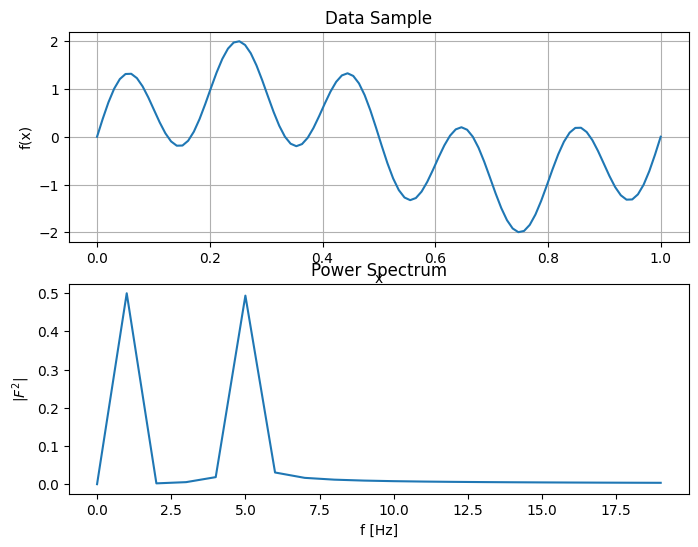

In [23]:
x = np.linspace(0,1,100)
f = np.sin(2*np.pi*x) + np.sin(10*np.pi*x)

F = DFT(f)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Data Sample')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.linspace(0,19,20),np.abs(F[0:20]))
plt.title('Power Spectrum')
plt.xlabel('f [Hz]')
plt.ylabel('$|F^2|$')
plt.show()

## DFT Matrix
The DFT algorithm can also be seen as a matrix vetor multiplication. The DFT matrix is highly symmetric and as we see in the next chapter has some special properties for the even/odd, even-even/odd-odd, rows and columns. These symmetries can be seen by plotting the matrix as an image. 
\begin{gather}
W_{nk} = \omega_N^{nk} = e^{i2 \pi nk/N}\\
W_{nk} = \begin{bmatrix} \omega_N^0 & \omega_N^0 & \omega_N^0 & \dotsb & \omega_N^0\\ \omega_N^0 &\omega_N^1&\omega_N^2 &\dotsb& \omega_N^{(N-1)} \\
\omega_N^0 & \omega_N^2 & \omega_N^4 & \dotsb & \omega_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\ \omega_N^0 & \omega_N^{(N-1)}& \omega_N^{2(N-1)} & \dotsb & \omega_N^{(N-1)^2} \end{bmatrix}
\end{gather}

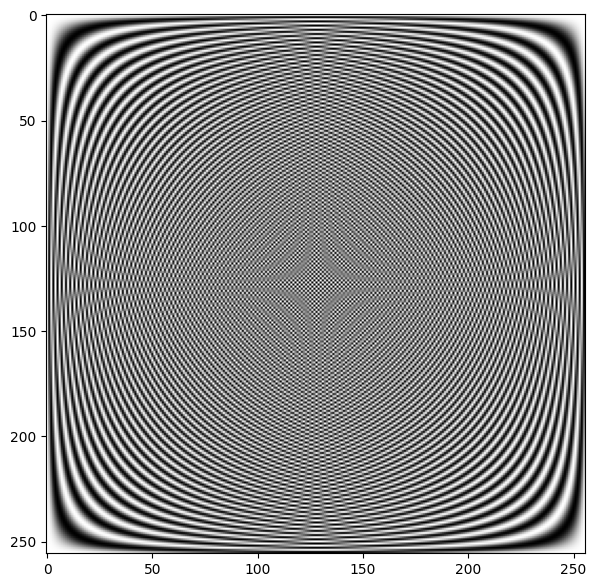

In [24]:
N = 256 # Size of DFT matrix (typically powers of 2)

W = np.array([[cmath.exp(1J*2*cmath.pi*n*k/N) for n in range(0,N)]for k in range (0,N)])

plt.figure(figsize=(7,7))
plt.imshow(np.real(W),cmap='gray')
plt.show()